In [1]:
!pip install kagglehub

In [4]:
!pip install opencv-python-headless Pillow numpy

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## **Огляд** **бібліотек**

**OpenCV (Open Source Computer Vision Library)**

OpenCV — це одна з найпоширеніших бібліотек для обробки зображень та комп'ютерного зору. Вона підтримує безліч мов програмування, включаючи Python, і надає близько 2500 алгоритмів для різних завдань, таких як розпізнавання облич, виявлення об'єктів та сегментація зображень.

**Pillow (Python Imaging Library, PIL)**

Pillow є форком бібліотеки PIL і забезпечує прості засоби для роботи із зображеннями: відкриття, обробка та збереження в різних форматах. Вона дозволяє виконувати операції, такі як зміна розміру, обрізка, поворот та фільтрація зображень. Pillow часто використовується для уніфікації фото й аналізу їхніх властивостей.

**NumPy**

NumPy — це бібліотека для роботи з багатовимірними масивами та виконання математичних операцій. В обробці зображень вона використовується для маніпуляції пікселями, маскування значень пікселів та обрізання зображень. NumPy є основою для багатьох інших бібліотек, включаючи OpenCV та Pillow.


In [7]:
import kagglehub

path = kagglehub.dataset_download("rameshrpatil/flying-object-dataset")

print("Path to dataset files:", path)

100%|██████████| 676M/676M [00:27<00:00, 25.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rameshrpatil/flying-object-dataset/versions/1


In [8]:
import shutil

src_path = "/root/.cache/kagglehub/datasets/rameshrpatil/flying-object-dataset/versions/1"
dst_path = "/content/drive/MyDrive/Flying object detection system"

shutil.move(src_path, dst_path)

print(f"Dataset переміщено в {dst_path}")

Dataset переміщено в /content/drive/MyDrive/Flying object detection system


In [4]:
class ImageLoader:
    def __init__(self, folder_path):
        """
        Ініціалізація модуля завантаження зображень.
        :param folder_path: шлях до папки з зображеннями.
        """
        self.folder_path = folder_path
        self.image_files = self._get_image_files()

    def _get_image_files(self):
        """
        Отримати список файлів у вказаній папці.
        """
        valid_extensions = (".png", ".jpg", ".jpeg", ".bmp")
        return [f for f in os.listdir(self.folder_path) if f.lower().endswith(valid_extensions)]

    def load_images(self):
        """
        Завантажує всі зображення в список NumPy-масивів.
        """
        images = []
        for img_file in self.image_files:
            img_path = os.path.join(self.folder_path, img_file)
            img = cv2.imread(img_path)  # Завантаження через OpenCV
            if img is not None:
                images.append((img_file, img))
        return images

    def show_image(self, img_name):
        """
        Відображає вибране зображення у двох варіантах (OpenCV та PIL).
        :param img_name: ім'я файлу зображення.
        """
        img_path = os.path.join(self.folder_path, img_name)

        # Завантаження через OpenCV
        img_cv2 = cv2.imread(img_path)
        img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

        # Завантаження через PIL
        img_pil = Image.open(img_path)

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(img_cv2)
        axes[0].set_title(f"OpenCV: {img_name}")
        axes[0].axis("off")

        axes[1].imshow(img_pil)
        axes[1].set_title(f"PIL: {img_name}")
        axes[1].axis("off")

        plt.show()

    def get_image_info(self, img_name):
        """
        Виводить характеристики зображення.
        :param img_name: ім'я файлу зображення.
        """
        img_path = os.path.join(self.folder_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Помилка: неможливо завантажити {img_name}")
            return

        height, width, channels = img.shape
        print(f"Файл: {img_name}")
        print(f"Розмір: {width}x{height}")
        print(f"Канали: {channels}")

    def plot_histogram(self, img_name):
        """ Побудова гістограми яскравості. """
        img_path = os.path.join(self.folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Помилка: неможливо завантажити {img_name}")
            return

        plt.figure(figsize=(8, 6))
        plt.hist(img.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
        plt.title(f"Гістограма яскравості: {img_name}")
        plt.xlabel("Яскравість")
        plt.ylabel("Кількість пікселів")
        plt.show()

    def enhance_contrast(self, img_name, method="equalization"):
        """
        Покращення контрастності: еквалізація гістограми або CLAHE.
        :param img_name: ім'я файлу зображення
        :param method: "equalization" або "clahe"
        """
        img_path = os.path.join(self.folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Помилка: неможливо завантажити {img_name}")
            return

        if method == "equalization":
            enhanced_img = cv2.equalizeHist(img)
            title = "Еквалізація гістограми"
        elif method == "clahe":
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            enhanced_img = clahe.apply(img)
            title = "CLAHE (адаптивна еквалізація)"
        else:
            print("Невідомий метод покращення контрастності")
            return

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(img, cmap="gray")
        axes[0].set_title(f"Оригінальне: {img_name}")
        axes[0].axis("off")

        axes[1].imshow(enhanced_img, cmap="gray")
        axes[1].set_title(title)
        axes[1].axis("off")

        plt.show()

In [5]:
folder_path = "/content/drive/MyDrive/Flying object detection system/1/UAV_Dataset/Helicopter"

loader = ImageLoader(folder_path)

images = loader.load_images()
print(f"Знайдено {len(images)} зображень")


Знайдено 1012 зображень


Файл: HELI_C1_1029.jpg
Розмір: 612x394
Канали: 3


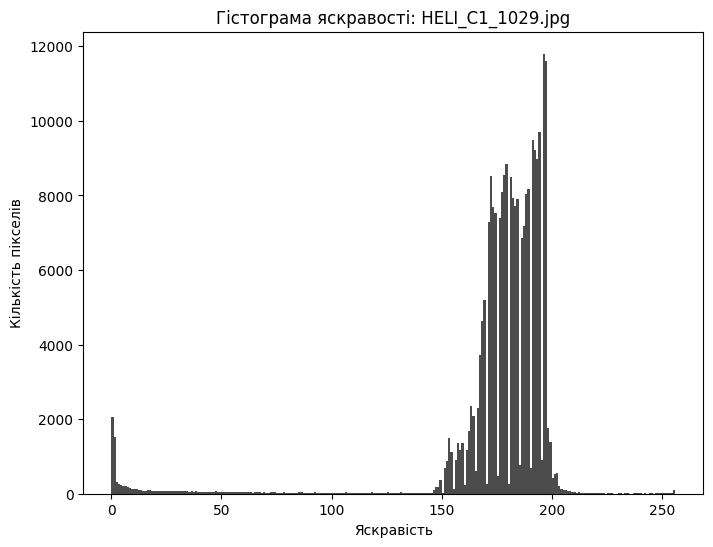

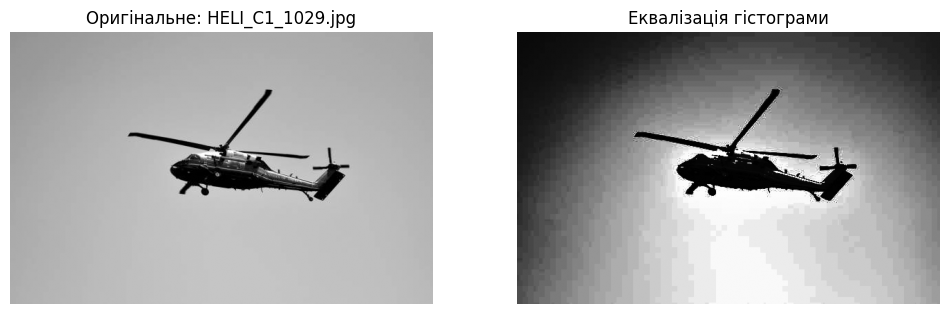

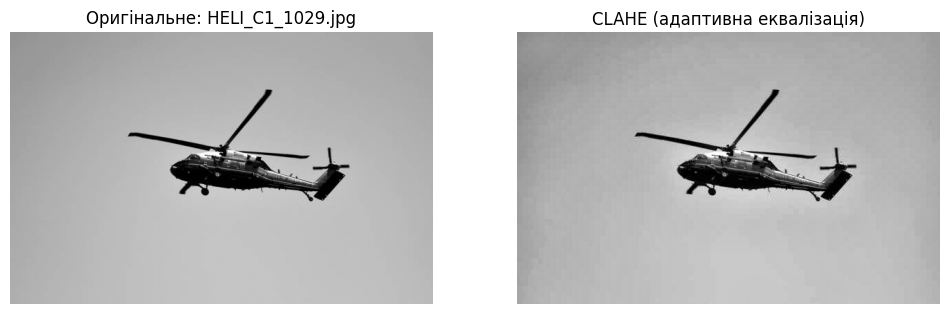

In [6]:
if images:
    img_name = images[0][0]

    loader.get_image_info(img_name)
    loader.plot_histogram(img_name)
    loader.enhance_contrast(img_name, method="equalization")
    loader.enhance_contrast(img_name, method="clahe")